In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler,StandardScaler


In [4]:
df = pd.read_csv("C:\\Users\\User\\Documents\\GitHub\\Canser-Prediction-Analysis\\data\\The_Cancer_data_1500_V2.csv")
df.head()


,Age,Gender,BMI,Smoking,GeneticRisk,PhysicalActivity,AlcoholIntake,CancerHistory,Diagnosis
0,58,1,16.085313,0,1,8.146251,4.148219,1,1
1,71,0,30.828784,0,1,9.361630,3.519683,0,0
2,48,1,38.785084,0,2,5.135179,4.728368,0,1
3,34,0,30.040296,0,0,9.502792,2.044636,0,0
4,62,1,35.479721,0,0,5.356890,3.309849,0,1


In [5]:
df.tail()

,Age,Gender,BMI,Smoking,GeneticRisk,PhysicalActivity,AlcoholIntake,CancerHistory,Diagnosis
1495,62,1,25.090025,0,0,9.892167,1.284158,0,1
1496,31,0,33.447125,0,1,1.668297,2.280636,1,1
1497,63,1,32.613861,1,1,0.466848,0.150101,0,1
1498,55,0,25.568216,0,0,7.795317,1.986138,1,1
1499,67,1,23.663104,0,0,2.525860,2.856600,1,0


In [6]:
df.dtypes

Age                   int64
Gender                int64
BMI                 float64
Smoking               int64
GeneticRisk           int64
PhysicalActivity    float64
AlcoholIntake       float64
CancerHistory         int64
Diagnosis             int64
dtype: object

In [10]:
# view dataset
df.shape 

(1500, 9)

In [11]:
#summary statistics-numarical columns
df.describe()

,Age,Gender,BMI,Smoking,GeneticRisk,PhysicalActivity,AlcoholIntake,CancerHistory,Diagnosis
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,50.320000,0.490667,27.513321,0.269333,0.508667,4.897929,2.417987,0.144000,0.371333
std,17.640968,0.500080,7.230012,0.443761,0.678895,2.866162,1.419318,0.351207,0.483322
min,20.000000,0.000000,15.000291,0.000000,0.000000,0.002410,0.001215,0.000000,0.000000
25%,35.000000,0.000000,21.483134,0.000000,0.000000,2.434609,1.210598,0.000000,0.000000
50%,51.000000,0.000000,27.598494,0.000000,0.000000,4.834316,2.382971,0.000000,0.000000
75%,66.000000,1.000000,33.850837,1.000000,1.000000,7.409896,3.585624,0.000000,1.000000
max,80.000000,1.000000,39.958688,1.000000,2.000000,9.994607,4.987115,1.000000,1.000000


In [12]:
#summary statistics -numerical and categorical columns
df.describe(include='all')

,Age,Gender,BMI,Smoking,GeneticRisk,PhysicalActivity,AlcoholIntake,CancerHistory,Diagnosis
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,50.320000,0.490667,27.513321,0.269333,0.508667,4.897929,2.417987,0.144000,0.371333
std,17.640968,0.500080,7.230012,0.443761,0.678895,2.866162,1.419318,0.351207,0.483322
min,20.000000,0.000000,15.000291,0.000000,0.000000,0.002410,0.001215,0.000000,0.000000
25%,35.000000,0.000000,21.483134,0.000000,0.000000,2.434609,1.210598,0.000000,0.000000
50%,51.000000,0.000000,27.598494,0.000000,0.000000,4.834316,2.382971,0.000000,0.000000
75%,66.000000,1.000000,33.850837,1.000000,1.000000,7.409896,3.585624,0.000000,1.000000
max,80.000000,1.000000,39.958688,1.000000,2.000000,9.994607,4.987115,1.000000,1.000000


In [13]:
# finding all mean values
df.mean()

Age                 50.320000
Gender               0.490667
BMI                 27.513321
Smoking              0.269333
GeneticRisk          0.508667
PhysicalActivity     4.897929
AlcoholIntake        2.417987
CancerHistory        0.144000
Diagnosis            0.371333
dtype: float64

In [14]:
df['BMI'].median()

np.float64(27.598494363554558)

In [15]:
df['Gender'].value_counts()


Gender
0    764
1    736
Name: count, dtype: int64

In [16]:
df['Diagnosis'].value_counts(normalize=True) * 100


Diagnosis
0    62.866667
1    37.133333
Name: proportion, dtype: float64

Group-Based Descriptions

In [17]:
#Average BMI by diagnosis
df.groupby('Diagnosis')['BMI'].mean()


Diagnosis
0    26.471469
1    29.277175
Name: BMI, dtype: float64

In [18]:
# Average alcohol intake by cancer history
df.groupby('CancerHistory')['AlcoholIntake'].mean()


CancerHistory
0    2.385746
1    2.609644
Name: AlcoholIntake, dtype: float64

In [19]:
# Average physical activity by smoking level
df.groupby('Smoking')['PhysicalActivity'].mean()


Smoking
0    4.974151
1    4.691148
Name: PhysicalActivity, dtype: float64

In [21]:
#missing values
df.isnull().sum()

Age                 0
Gender              0
BMI                 0
Smoking             0
GeneticRisk         0
PhysicalActivity    0
AlcoholIntake       0
CancerHistory       0
Diagnosis           0
dtype: int64

In [22]:
#check total missing values
df.isnull().sum().sum()

np.int64(0)

In [23]:
#check duplicates
df.duplicated().sum()

np.int64(0)

In [24]:
#bascic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               1500 non-null   int64  
 1   Gender            1500 non-null   int64  
 2   BMI               1500 non-null   float64
 3   Smoking           1500 non-null   int64  
 4   GeneticRisk       1500 non-null   int64  
 5   PhysicalActivity  1500 non-null   float64
 6   AlcoholIntake     1500 non-null   float64
 7   CancerHistory     1500 non-null   int64  
 8   Diagnosis         1500 non-null   int64  
dtypes: float64(3), int64(6)
memory usage: 105.6 KB


In [25]:
df['Gender'].unique()

array([1, 0])

In [26]:
#detect outliers
import numpy as np

Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()
print("Number of outliers in each column:")
print(outliers)


Number of outliers in each column:
Age                   0
Gender                0
BMI                   0
Smoking               0
GeneticRisk           0
PhysicalActivity      0
AlcoholIntake         0
CancerHistory       216
Diagnosis             0
dtype: int64


In [27]:
from scipy import stats
import numpy as np

z_scores = np.abs(stats.zscore(df.select_dtypes(include=[int, float])))
outliers_z = (z_scores > 3).sum(axis=0)

print("Outliers detected (Z-score > 3):")
print(outliers_z)


Outliers detected (Z-score > 3):
[0 0 0 0 0 0 0 0 0]


In [28]:
df.skew()


Age                -0.032819
Gender              0.037377
BMI                -0.021391
Smoking             1.040986
GeneticRisk         0.980511
PhysicalActivity    0.076022
AlcoholIntake       0.055101
CancerHistory       2.030002
Diagnosis           0.533137
dtype: float64

In [29]:
df['Diagnosis'].value_counts()

Diagnosis
0    943
1    557
Name: count, dtype: int64

In [30]:
# Action for skewed features:
import numpy as np

df['CancerHistory_log'] = np.log1p(df['CancerHistory'])
df['Smoking_log'] = np.log1p(df['Smoking'])
df['GeneticRisk_log'] = np.log1p(df['GeneticRisk'])


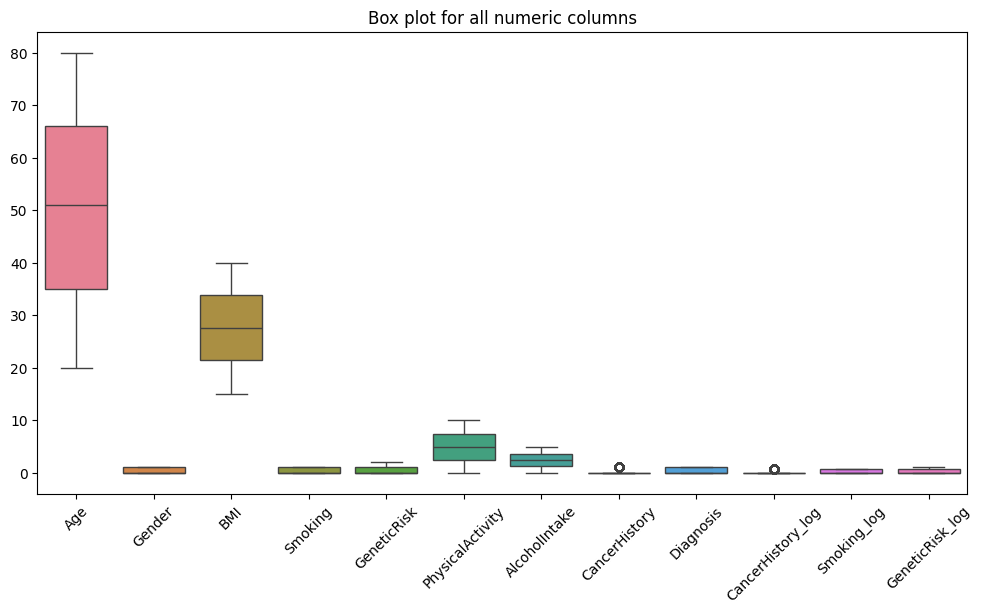

In [31]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df)
plt.title("Box plot for all numeric columns")
plt.xticks(rotation=45)
plt.show()

In [32]:
df['AgeGroup'] = pd.cut(df['Age'],
                        bins=[0, 30, 45, 60, 100],
                        labels=['Young', 'Adult', 'MiddleAge', 'Senior'])


In [33]:
df['BMICategory'] = pd.cut(df['BMI'],
                           bins=[0, 18.5, 24.9, 29.9, 100],
                           labels=['Underweight', 'Normal', 'Overweight', 'Obese'])


In [34]:
df['AlcoholLevel'] = pd.qcut(df['AlcoholIntake'], q=3, labels=['Low','Medium','High'])


In [35]:
df['ActivityLevel'] = pd.qcut(df['PhysicalActivity'], q=3, labels=['Low','Medium','High'])


In [36]:
df['BMI_AgeInteraction'] = df['BMI'] * df['Age']


In [37]:
df.head()
df.columns


Index(['Age', 'Gender', 'BMI', 'Smoking', 'GeneticRisk', 'PhysicalActivity',
       'AlcoholIntake', 'CancerHistory', 'Diagnosis', 'CancerHistory_log',
       'Smoking_log', 'GeneticRisk_log', 'AgeGroup', 'BMICategory',
       'AlcoholLevel', 'ActivityLevel', 'BMI_AgeInteraction'],
      dtype='object')

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Age                 1500 non-null   int64   
 1   Gender              1500 non-null   int64   
 2   BMI                 1500 non-null   float64 
 3   Smoking             1500 non-null   int64   
 4   GeneticRisk         1500 non-null   int64   
 5   PhysicalActivity    1500 non-null   float64 
 6   AlcoholIntake       1500 non-null   float64 
 7   CancerHistory       1500 non-null   int64   
 8   Diagnosis           1500 non-null   int64   
 9   CancerHistory_log   1500 non-null   float64 
 10  Smoking_log         1500 non-null   float64 
 11  GeneticRisk_log     1500 non-null   float64 
 12  AgeGroup            1500 non-null   category
 13  BMICategory         1500 non-null   category
 14  AlcoholLevel        1500 non-null   category
 15  ActivityLevel       1500 non-null   ca

In [39]:
df.describe()

,Age,Gender,BMI,Smoking,GeneticRisk,PhysicalActivity,AlcoholIntake,CancerHistory,Diagnosis,CancerHistory_log,Smoking_log,GeneticRisk_log,BMI_AgeInteraction
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,50.320000,0.490667,27.513321,0.269333,0.508667,4.897929,2.417987,0.144000,0.371333,0.099813,0.186688,0.322278,1388.325452
std,17.640968,0.500080,7.230012,0.443761,0.678895,2.866162,1.419318,0.351207,0.483322,0.243438,0.307592,0.408111,623.962589
min,20.000000,0.000000,15.000291,0.000000,0.000000,0.002410,0.001215,0.000000,0.000000,0.000000,0.000000,0.000000,308.776182
25%,35.000000,0.000000,21.483134,0.000000,0.000000,2.434609,1.210598,0.000000,0.000000,0.000000,0.000000,0.000000,890.263757
50%,51.000000,0.000000,27.598494,0.000000,0.000000,4.834316,2.382971,0.000000,0.000000,0.000000,0.000000,0.000000,1309.745002
75%,66.000000,1.000000,33.850837,1.000000,1.000000,7.409896,3.585624,0.000000,1.000000,0.000000,0.693147,0.693147,1809.222724
max,80.000000,1.000000,39.958688,1.000000,2.000000,9.994607,4.987115,1.000000,1.000000,0.693147,0.693147,1.098612,3115.250569


In [7]:
# Correlation matrix for numerical features
corr_matrix = df.corr(numeric_only=True)

print("Correlation Matrix:")
print(corr_matrix)


Correlation Matrix:
                       Age    Gender       BMI   Smoking  GeneticRisk  \
Age               1.000000  0.007145  0.030246 -0.013914    -0.027025   
Gender            0.007145  1.000000 -0.012516  0.035384    -0.004674   
BMI               0.030246 -0.012516  1.000000 -0.012616     0.011392   
Smoking          -0.013914  0.035384 -0.012616  1.000000    -0.021039   
GeneticRisk      -0.027025 -0.004674  0.011392 -0.021039     1.000000   
PhysicalActivity  0.016396  0.023401  0.011480 -0.043817    -0.039721   
AlcoholIntake     0.003209  0.009723  0.004711 -0.001660    -0.016864   
CancerHistory    -0.010996  0.007657 -0.010824  0.016368    -0.010833   
Diagnosis         0.196603  0.250336  0.187560  0.226999     0.253472   

                  PhysicalActivity  AlcoholIntake  CancerHistory  Diagnosis  
Age                       0.016396       0.003209      -0.010996   0.196603  
Gender                    0.023401       0.009723       0.007657   0.250336  
BMI            

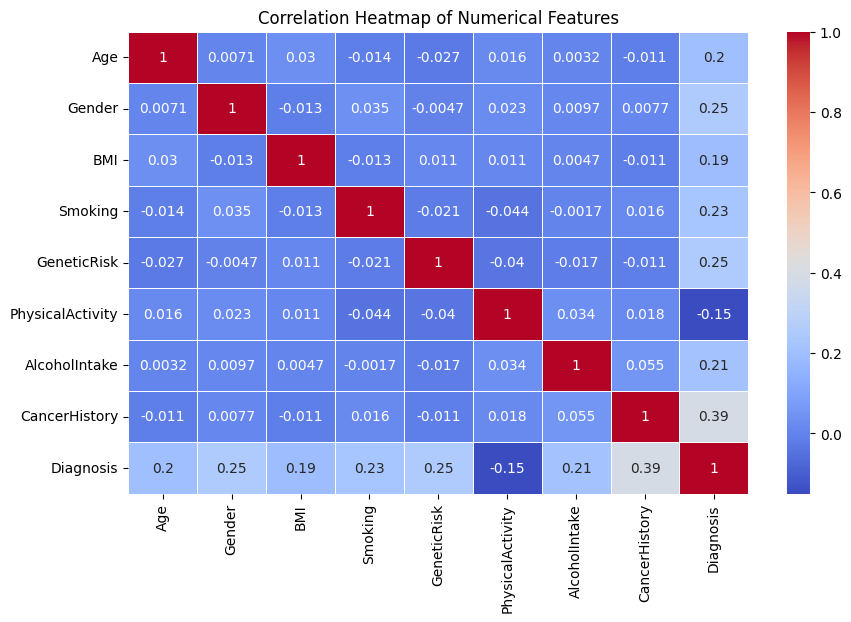

In [8]:
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()


convert data types

In [43]:
categorical_cols = ['Gender', 'Smoking', 'GeneticRisk', 'CancerHistory', 'Diagnosis']

for col in categorical_cols:
    df[col] = df[col].astype('category')


In [44]:
numeric_cols=['Age','BMI','PhysicalActivity','AlcoholIntake']

In [45]:
minmax=MinMaxScaler()
df_minmax=df.copy()
df_minmax[numeric_cols]=minmax.fit_transform(df[numeric_cols])

In [47]:
std_scaler=StandardScaler()
df_standard=df.copy()
df_standard[numeric_cols]=std_scaler.fit_transform(df[numeric_cols])

In [49]:
df_zscore = df.copy()

df_zscore[numeric_cols] = (df[numeric_cols] - df[numeric_cols].mean()) / df[numeric_cols].std()


In [52]:
df.head()

,Age,Gender,BMI,Smoking,GeneticRisk,PhysicalActivity,AlcoholIntake,CancerHistory,Diagnosis,CancerHistory_log,Smoking_log,GeneticRisk_log,AgeGroup,BMICategory,AlcoholLevel,ActivityLevel,BMI_AgeInteraction
0,58,1,16.085313,0,1,8.146251,4.148219,1,1,0.693147,0.0,0.693147,MiddleAge,Underweight,High,High,932.948173
1,71,0,30.828784,0,1,9.361630,3.519683,0,0,0.000000,0.0,0.693147,Senior,Obese,High,High,2188.843692
2,48,1,38.785084,0,2,5.135179,4.728368,0,1,0.000000,0.0,1.098612,MiddleAge,Obese,High,Medium,1861.684011
3,34,0,30.040296,0,0,9.502792,2.044636,0,0,0.000000,0.0,0.000000,Adult,Obese,Medium,High,1021.370047
4,62,1,35.479721,0,0,5.356890,3.309849,0,1,0.000000,0.0,0.000000,Senior,Obese,High,Medium,2199.742732


In [51]:
df_minmax.head()

,Age,Gender,BMI,Smoking,GeneticRisk,PhysicalActivity,AlcoholIntake,CancerHistory,Diagnosis,CancerHistory_log,Smoking_log,GeneticRisk_log,AgeGroup,BMICategory,AlcoholLevel,ActivityLevel,BMI_AgeInteraction
0,0.633333,1,0.043473,0,1,0.815020,0.831746,1,1,0.693147,0.0,0.693147,MiddleAge,Underweight,High,High,932.948173
1,0.850000,0,0.634195,0,1,0.936653,0.705684,0,0,0.000000,0.0,0.693147,Senior,Obese,High,High,2188.843692
2,0.466667,1,0.952978,0,2,0.513678,0.948104,0,1,0.000000,0.0,1.098612,MiddleAge,Obese,High,Medium,1861.684011
3,0.233333,0,0.602603,0,0,0.950780,0.409840,0,0,0.000000,0.0,0.000000,Adult,Obese,Medium,High,1021.370047
4,0.700000,1,0.820543,0,0,0.535866,0.663598,0,1,0.000000,0.0,0.000000,Senior,Obese,High,Medium,2199.742732


In [53]:
df_standard.head()

,Age,Gender,BMI,Smoking,GeneticRisk,PhysicalActivity,AlcoholIntake,CancerHistory,Diagnosis,CancerHistory_log,Smoking_log,GeneticRisk_log,AgeGroup,BMICategory,AlcoholLevel,ActivityLevel,BMI_AgeInteraction
0,0.435495,1,-1.581162,0,1,1.133713,1.219465,1,1,0.693147,0.0,0.693147,MiddleAge,Underweight,High,High,932.948173
1,1.172662,0,0.458722,0,1,1.557899,0.776474,0,0,0.000000,0.0,0.693147,Senior,Obese,High,High,2188.843692
2,-0.131556,1,1.559544,0,2,0.082804,1.628353,0,1,0.000000,0.0,1.098612,MiddleAge,Obese,High,Medium,1861.684011
3,-0.925428,0,0.349628,0,0,1.607166,-0.263137,0,0,0.000000,0.0,0.000000,Adult,Obese,Medium,High,1021.370047
4,0.662316,1,1.102219,0,0,0.160184,0.628583,0,1,0.000000,0.0,0.000000,Senior,Obese,High,Medium,2199.742732


In [54]:
df_zscore.head()

,Age,Gender,BMI,Smoking,GeneticRisk,PhysicalActivity,AlcoholIntake,CancerHistory,Diagnosis,CancerHistory_log,Smoking_log,GeneticRisk_log,AgeGroup,BMICategory,AlcoholLevel,ActivityLevel,BMI_AgeInteraction
0,0.435350,1,-1.580635,0,1,1.133335,1.219059,1,1,0.693147,0.0,0.693147,MiddleAge,Underweight,High,High,932.948173
1,1.172271,0,0.458570,0,1,1.557379,0.776215,0,0,0.000000,0.0,0.693147,Senior,Obese,High,High,2188.843692
2,-0.131512,1,1.559024,0,2,0.082776,1.627810,0,1,0.000000,0.0,1.098612,MiddleAge,Obese,High,Medium,1861.684011
3,-0.925119,0,0.349512,0,0,1.606630,-0.263050,0,0,0.000000,0.0,0.000000,Adult,Obese,Medium,High,1021.370047
4,0.662095,1,1.101852,0,0,0.160131,0.628374,0,1,0.000000,0.0,0.000000,Senior,Obese,High,Medium,2199.742732


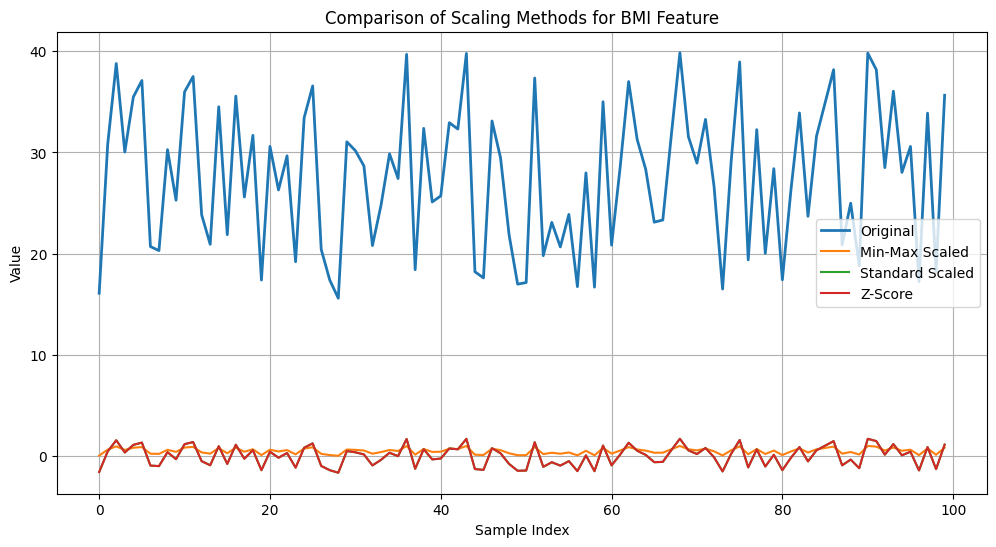

In [ ]:

feature = "BMI"

x = df[[feature]]  

# ----- 1. Min-Max Scaling -----
minmax = MinMaxScaler()
df_minmax = minmax.fit_transform(x)

# ----- 2. StandardScaler -----
scaler = StandardScaler()
df_standard = scaler.fit_transform(x)

# ----- 3. Z-score (manual) -----
df_zscore = (x - x.mean()) / x.std()

# ----- Create Plot -----
plt.figure(figsize=(12, 6))
plt.plot(x.values[:100], label="Original", linewidth=2) 
plt.plot(df_minmax[:100], label="Min-Max Scaled")
plt.plot(df_standard[:100], label="Standard Scaled")
plt.plot(df_zscore.values[:100], label="Z-Score")

plt.title("Comparison of Scaling Methods for BMI Feature")
plt.xlabel("Sample Index")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.show()


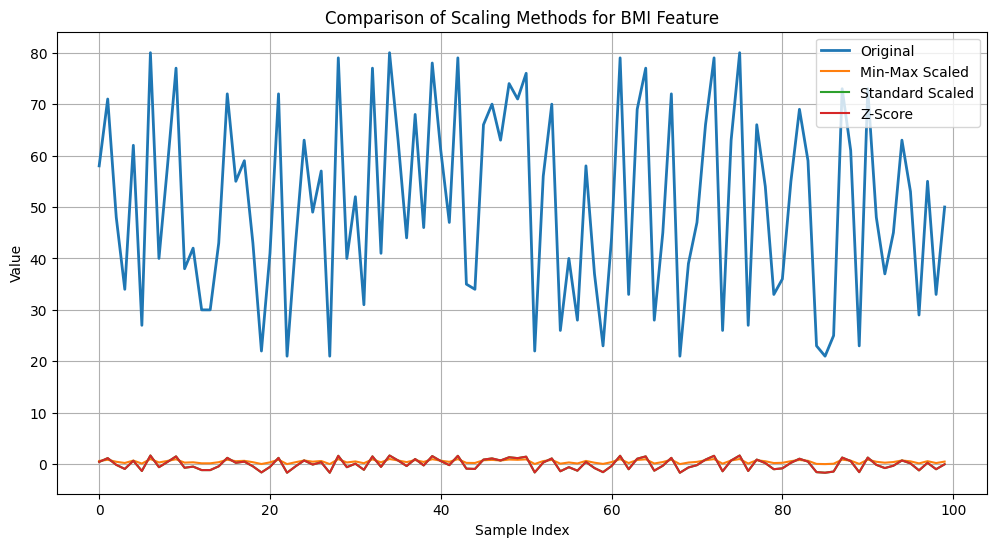

In [ ]:

feature = "Age"

x = df[[feature]]
# ----- 1. Min-Max Scaling -----
minmax = MinMaxScaler()
df_minmax = minmax.fit_transform(x)

# ----- 2. StandardScaler -----
scaler = StandardScaler()
df_standard = scaler.fit_transform(x)

# ----- 3. Z-score (manual) -----
df_zscore = (x - x.mean()) / x.std()

# ----- Create Plot -----
plt.figure(figsize=(12, 6))
plt.plot(x.values[:100], label="Original", linewidth=2) 
plt.plot(df_minmax[:100], label="Min-Max Scaled")
plt.plot(df_standard[:100], label="Standard Scaled")
plt.plot(df_zscore.values[:100], label="Z-Score")

plt.title("Age")
plt.xlabel("Sample Index")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.show()



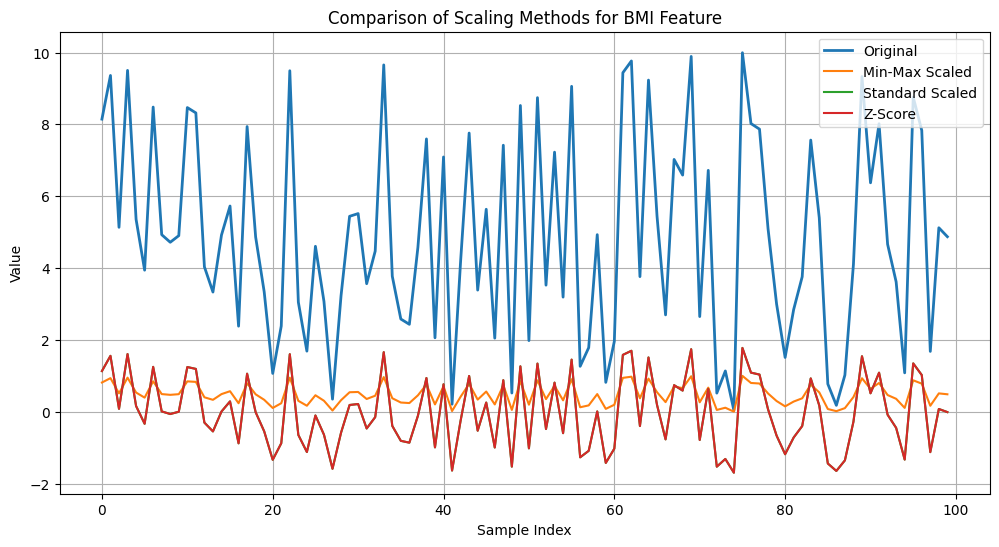

In [ ]:

feature = "PhysicalActivity"

x = df[[feature]] 
# ----- 1. Min-Max Scaling -----
minmax = MinMaxScaler()
df_minmax = minmax.fit_transform(x)

# ----- 2. StandardScaler -----
scaler = StandardScaler()
df_standard = scaler.fit_transform(x)

# ----- 3. Z-score (manual) -----
df_zscore = (x - x.mean()) / x.std()

# ----- Create Plot -----
plt.figure(figsize=(12, 6))
plt.plot(x.values[:100], label="Original", linewidth=2) 
plt.plot(df_minmax[:100], label="Min-Max Scaled")
plt.plot(df_standard[:100], label="Standard Scaled")
plt.plot(df_zscore.values[:100], label="Z-Score")

plt.title("PhysicalActivity")
plt.xlabel("Sample Index")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.show()


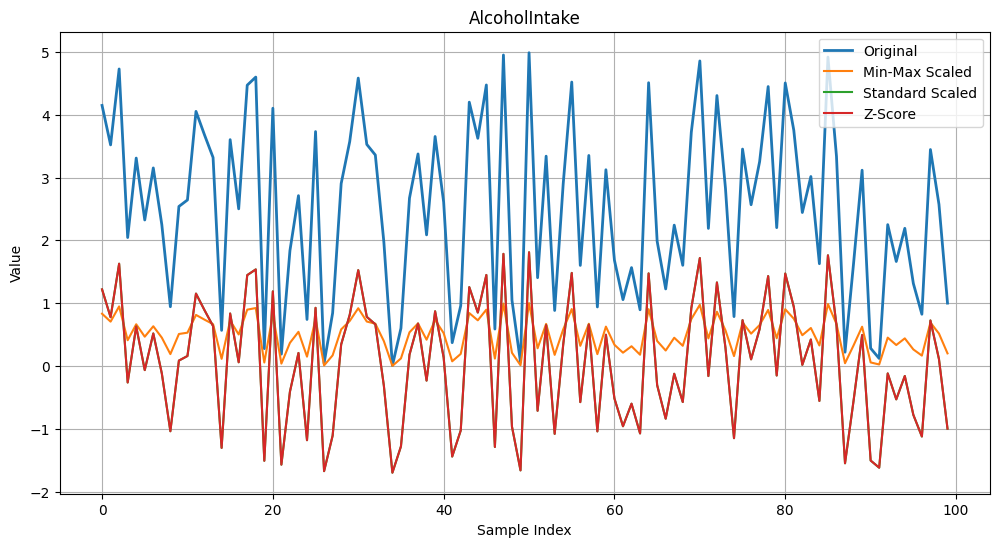

In [60]:
feature = "AlcoholIntake"

x = df[[feature]] 
# ----- 1. Min-Max Scaling -----
minmax = MinMaxScaler()
df_minmax = minmax.fit_transform(x)

# ----- 2. StandardScaler -----
scaler = StandardScaler()
df_standard = scaler.fit_transform(x)

# ----- 3. Z-score (manual) -----
df_zscore = (x - x.mean()) / x.std()

# ----- Create Plot -----
plt.figure(figsize=(12, 6))
plt.plot(x.values[:100], label="Original", linewidth=2) 
plt.plot(df_minmax[:100], label="Min-Max Scaled")
plt.plot(df_standard[:100], label="Standard Scaled")
plt.plot(df_zscore.values[:100], label="Z-Score")

plt.title("AlcoholIntake")
plt.xlabel("Sample Index")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.show()

Pivot Table:Average BMI by Gender & Smoking

In [62]:
pivot1=df.pivot_table(
    values='BMI',
    index='Gender',
    columns='Smoking',
    aggfunc='mean'
)

print(pivot1)

Smoking          0          1
Gender                       
0        27.599458  27.609897
1        27.535330  27.135178


C:\Users\User\AppData\Local\Temp\ipykernel_20600\2210582958.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot1=df.pivot_table(


Pivot Table:Count of patients by CancerHistory & Diagnosis

In [61]:
pivot2=df.pivot_table(
    values='Age',
    index='CancerHistory',
    columns='Diagnosis',
    aggfunc='count'
)

print(pivot2)

Diagnosis        0    1
CancerHistory          
0              907  377
1               36  180


C:\Users\User\AppData\Local\Temp\ipykernel_20600\2894089564.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot2=df.pivot_table(


Mean Age and BMI grouped by Diagnosis

In [63]:
pivot3=df.pivot_table(
    values=['Age','BMI'],
    index='Diagnosis',
    aggfunc='mean'
)
print(pivot3)

                 Age        BMI
Diagnosis                      
0          47.655355  26.471469
1          54.831239  29.277175


C:\Users\User\AppData\Local\Temp\ipykernel_20600\2725665286.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot3=df.pivot_table(
